https://github.com/dunovank/jupyter-themes

# Pandas

If you've never used `pandas` before, it's amazingly useful, and at times frustrating.

Recommended links: 

 - [Jake Vanderplas Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)
 - http://pandas.pydata.org/pandas-docs/stable/gotchas.html
 - https://github.com/dwhitena/blog-content/blob/master/python_pitfalls/Python-Pitfalls.ipynb
 - http://pandas.pydata.org/pandas-docs/stable/cookbook.html

Read through this full series of excellent blog posts by [Tom Augspurger](http://tomaugspurger.github.io/modern-1.html).

High level tip

 - try to represent data in the proper format
   - floats as floats; ints as ints; etc. 
   - Especially if you have dates, or timestamps, or datetimestamps, keep them in that format. 
      
This pdf [Tidy Data](http://vita.had.co.nz/papers/tidy-data.pdf) by Hadley Wickham is an excellent read with a lot that relates to data analysis in any language. 

In [4]:
from __future__ import absolute_import, division, print_function

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid') 
# sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

In [6]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

### Note

Using cleaned data from [Data Cleaning](Data%20Cleaning.ipynb) Notebook. See Notebook for details.

In [7]:
df = pd.read_csv("../data/coal_prod_cleaned.csv")

In [8]:
df.head()

,MSHA_ID,Average_Employees,Company_Type,Labor_Hours,Mine_Basin,Mine_County,Mine_Name,Mine_State,Mine_Status,Mine_Type,Operating_Company,Operating_Company_Address,Operation_Type,Production_short_tons,Union_Code,Year
0,103295,18.0,Independent Producer Operator,39175.0,Appalachia Southern,Bibb,Seymour Mine,Alabama,Active,Surface,Hope Coal Company Inc,"P.O. Box 249, Maylene, AL 35114",Mine only,105082.0,NaN,2008
1,103117,19.0,Operating Subsidiary,29926.0,Appalachia Southern,Cullman,"Mine #2, #3, #4",Alabama,"Active, men working, not producing",Surface,Twin Pines Coal Company Inc,"1874 County Road 15, Bremen, AL 35033",Mine only,10419.0,NaN,2008
2,103361,20.0,Operating Subsidiary,42542.0,Appalachia Southern,Cullman,Cold Springs West Mine,Alabama,Active,Surface,Twin Pines Coal Company,"74 Industrial Parkway, Jasper, AL 35502",Mine only,143208.0,NaN,2008
3,100759,395.0,Operating Subsidiary,890710.0,Appalachia Southern,Fayette,North River # 1 Underground Mi,Alabama,Active,Underground,Chevron Mining Inc,"3114 County Road 63 S, Berry, AL 35546",Mine and Preparation Plant,2923261.0,United Mine Workers of America,2008
4,103246,22.0,Independent Producer Operator,55403.0,Appalachia Southern,Franklin,Bear Creek,Alabama,Active,Surface,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",Mine only,183137.0,NaN,2008


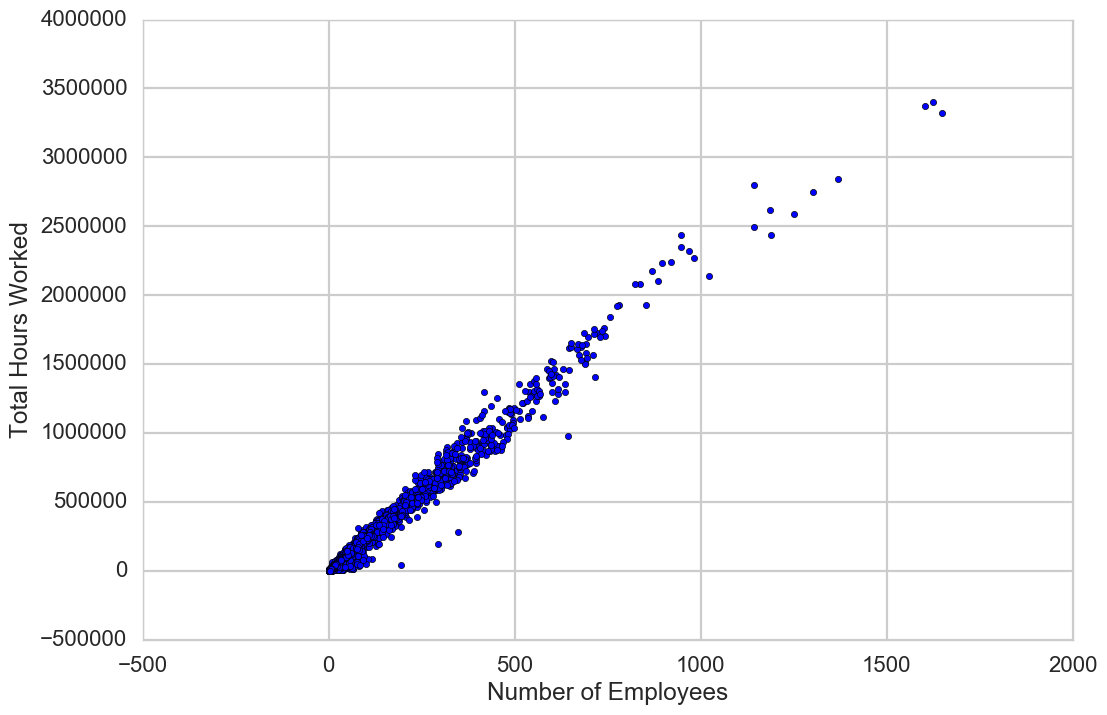

In [10]:
plt.scatter(df['Average_Employees'], 
            df.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked");

In [20]:
colors = sns.color_palette(n_colors=df.Year.nunique())

In [21]:
color_dict = {key: value for key, value in zip(sorted(df.Year.unique()), colors)}

In [22]:
color_dict

{2008: (0.0, 0.4470588235294118, 0.6980392156862745),
 2009: (0.0, 0.6196078431372549, 0.45098039215686275),
 2010: (0.8352941176470589, 0.3686274509803922, 0.0),
 2011: (0.8, 0.4745098039215686, 0.6549019607843137),
 2012: (0.9411764705882353, 0.8941176470588236, 0.25882352941176473)}

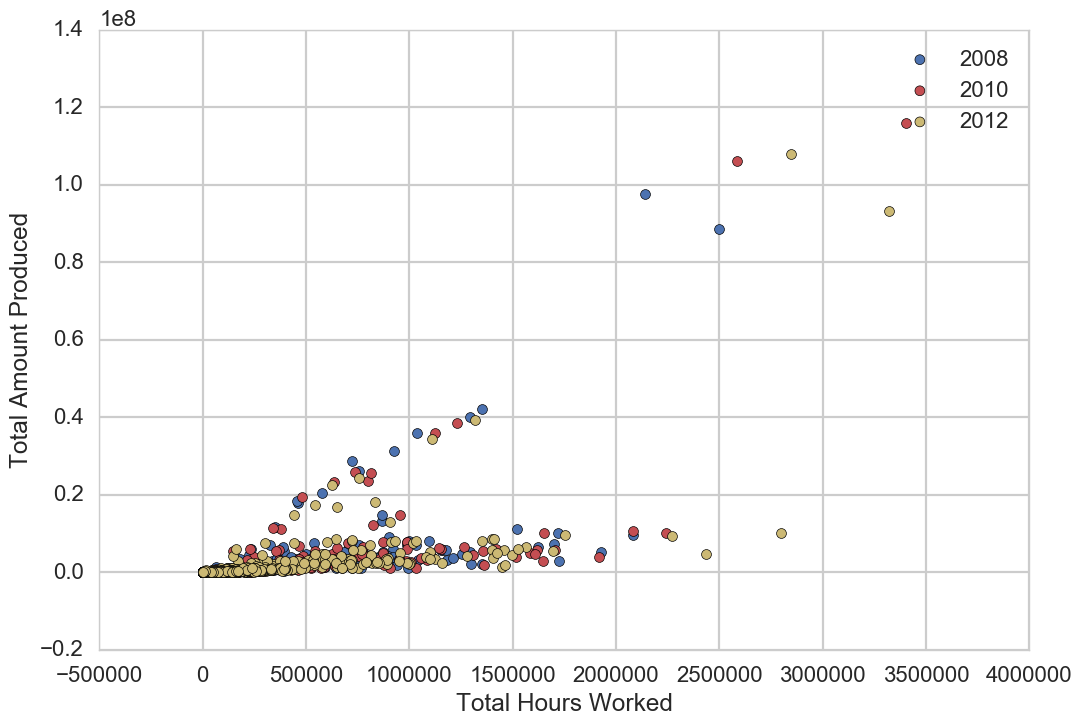

In [14]:
for year in sorted(df.Year.unique()[[0, 2, -1]]):
    plt.scatter(df[df.Year == year].Labor_Hours,
                df[df.Year == year].Production_short_tons, 
                c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend()
plt.savefig("ex1.png")

In [15]:
import matplotlib as mpl

In [16]:
mpl.style.use('seaborn-colorblind')

In [17]:
plt.style.available

['fivethirtyeight',
 'seaborn-darkgrid',
 'seaborn-pastel',
 'seaborn-paper',
 'seaborn-dark',
 'seaborn-colorblind',
 'seaborn-whitegrid',
 'seaborn-deep',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-muted',
 'seaborn-notebook',
 'grayscale',
 'seaborn-talk',
 'dark_background',
 'bmh',
 'ggplot',
 'seaborn-dark-palette',
 'seaborn-poster',
 'classic',
 'seaborn-bright']

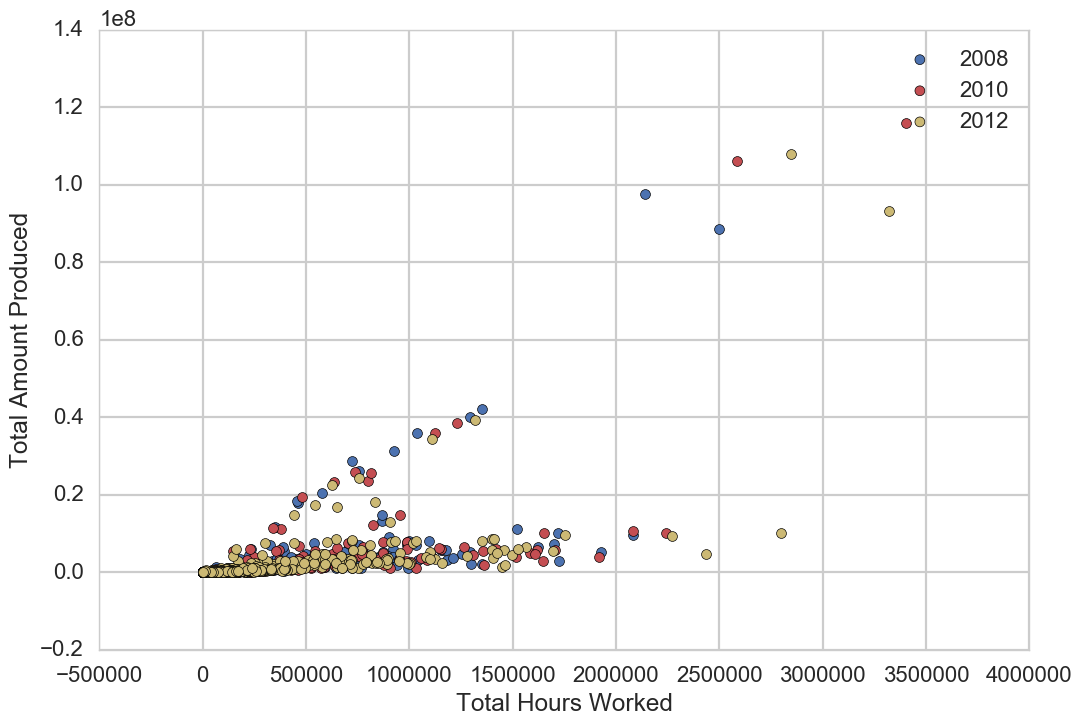

In [19]:
for year in sorted(df.Year.unique()[[0, 2, -1]]):
    plt.scatter(df[df.Year == year].Labor_Hours,
                df[df.Year == year].Production_short_tons, 
                c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend();
# plt.savefig("ex1.png")

In [23]:
df_dict = load_boston()
features = pd.DataFrame(data=df_dict.data, columns = df_dict.feature_names)
target = pd.DataFrame(data=df_dict.target, columns = ['MEDV'])
df = pd.concat([features, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


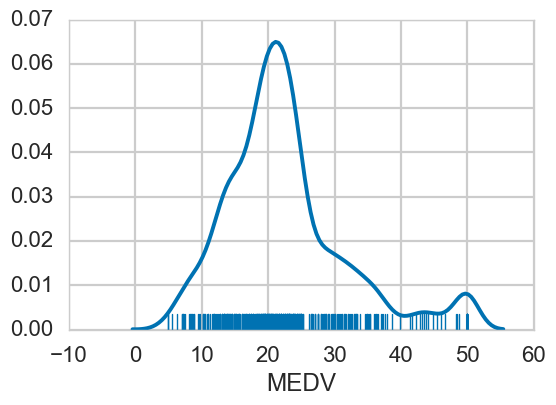

In [27]:
# Target variable
fig, ax = plt.subplots(figsize=(6, 4))
sns.distplot(df.MEDV, ax=ax, rug=True, hist=False)

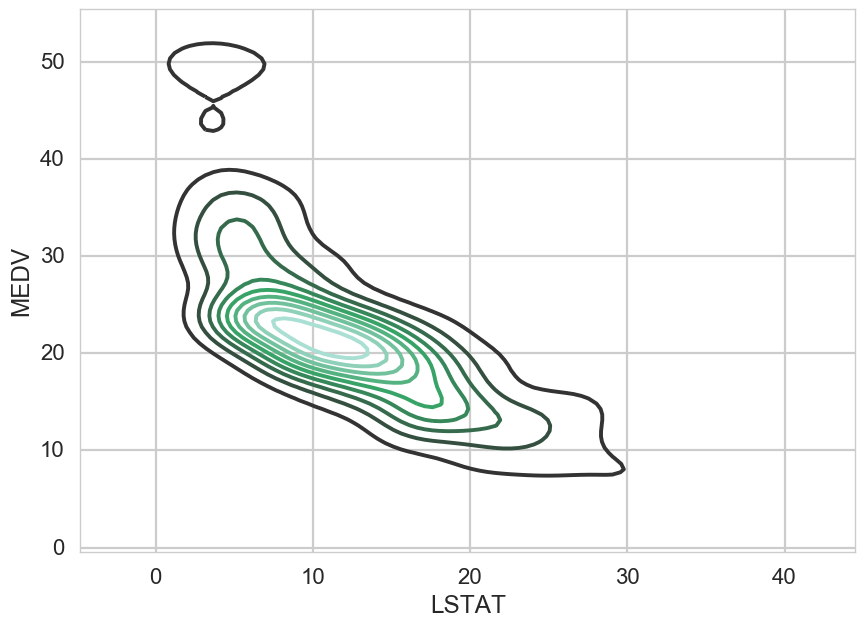

In [25]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.LSTAT,
            df.MEDV,
            ax=ax)

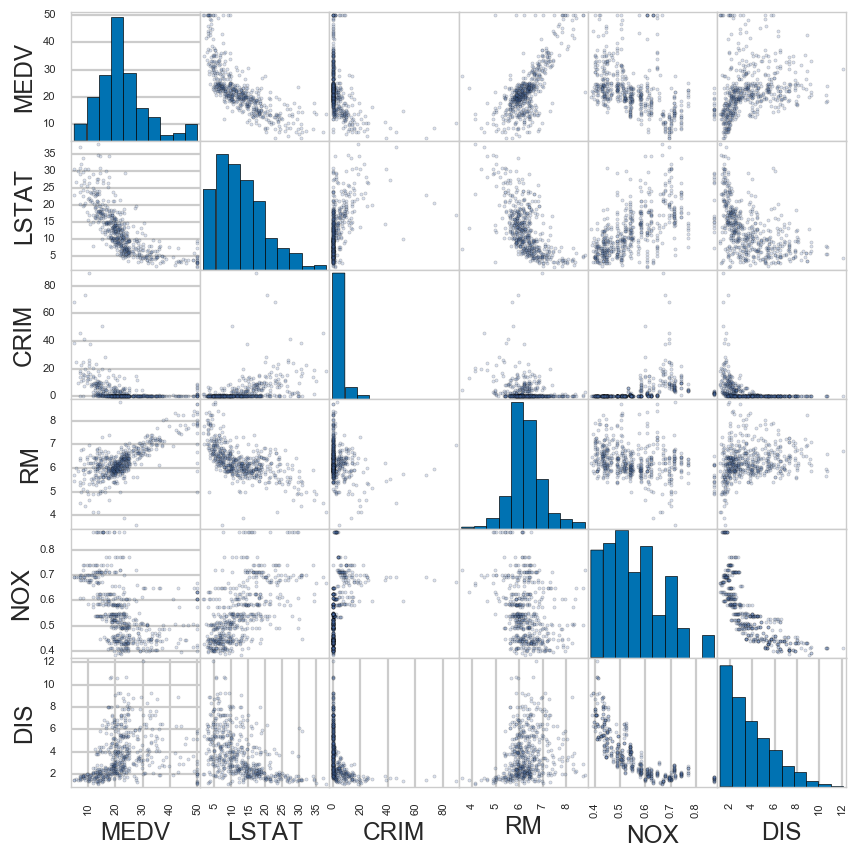

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(df[['MEDV', 'LSTAT', 'CRIM', 'RM', 'NOX', 'DIS']], alpha=0.2, diagonal='hist', ax=ax);

In [ ]:
pd.cut()